# 決定木による回帰問題解決

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

rng = np.random.RandomState(42)

$0\leqq x \leqq 5$の範囲で入力点を100個生成し、対応する$sin$の値を計算する。

In [2]:
X = np.sort(5 * rng.rand(100, 1), axis=0)
y = np.sin(X)
y

array([[ 0.02760708],
       [ 0.10274086],
       [ 0.12675374],
       [ 0.17109663],
       [ 0.22421402],
       [ 0.2301697 ],
       [ 0.2863528 ],
       [ 0.31246965],
       [ 0.31955324],
       [ 0.36182357],
       [ 0.36418096],
       [ 0.42816613],
       [ 0.46917873],
       [ 0.5136703 ],
       [ 0.54747619],
       [ 0.5629669 ],
       [ 0.57302415],
       [ 0.64228004],
       [ 0.64774523],
       [ 0.70325994],
       [ 0.70334567],
       [ 0.75300739],
       [ 0.78896631],
       [ 0.7937943 ],
       [ 0.79818258],
       [ 0.83044964],
       [ 0.83798406],
       [ 0.84058858],
       [ 0.87318314],
       [ 0.9619085 ],
       [ 0.97717839],
       [ 0.98623315],
       [ 0.99343481],
       [ 0.99394807],
       [ 0.99877091],
       [ 0.99886126],
       [ 0.99987384],
       [ 0.99992508],
       [ 0.99848126],
       [ 0.9984405 ],
       [ 0.99649972],
       [ 0.97740741],
       [ 0.97556191],
       [ 0.96612909],
       [ 0.95477201],
       [ 0

In [3]:
# ravel()を利用することで、配列を一次元化する
y = y.ravel()
y

array([ 0.02760708,  0.10274086,  0.12675374,  0.17109663,  0.22421402,
        0.2301697 ,  0.2863528 ,  0.31246965,  0.31955324,  0.36182357,
        0.36418096,  0.42816613,  0.46917873,  0.5136703 ,  0.54747619,
        0.5629669 ,  0.57302415,  0.64228004,  0.64774523,  0.70325994,
        0.70334567,  0.75300739,  0.78896631,  0.7937943 ,  0.79818258,
        0.83044964,  0.83798406,  0.84058858,  0.87318314,  0.9619085 ,
        0.97717839,  0.98623315,  0.99343481,  0.99394807,  0.99877091,
        0.99886126,  0.99987384,  0.99992508,  0.99848126,  0.9984405 ,
        0.99649972,  0.97740741,  0.97556191,  0.96612909,  0.95477201,
        0.93138759,  0.84356508,  0.83153619,  0.80804746,  0.75865278,
        0.7036476 ,  0.6230333 ,  0.6176162 ,  0.53998599,  0.51520991,
        0.50374496,  0.49497885,  0.41515415,  0.39681216,  0.32896434,
        0.17855712,  0.15150706,  0.14775724,  0.13559858,  0.10368173,
        0.08223521,  0.02509938, -0.04617828, -0.17018634, -0.27

$y$の値に対して、1つおきに(y[::2])ノイズを加える。ノイズの値は$0.5$

In [4]:
y[::2] += 0.5 * (0.5 - rng.rand(50))
y

array([ 0.26189248,  0.10274086,  0.05854854,  0.17109663,  0.31703603,
        0.2301697 ,  0.28206746,  0.31246965,  0.11577   ,  0.36182357,
        0.48953484,  0.42816613,  0.51398727,  0.5136703 ,  0.41970062,
        0.5629669 ,  0.70862506,  0.64228004,  0.85925527,  0.70325994,
        0.80846995,  0.75300739,  0.95835567,  0.7937943 ,  0.58333376,
        0.83044964,  0.68392387,  0.84058858,  0.80648126,  0.9619085 ,
        0.79144809,  0.98623315,  0.84159877,  0.99394807,  1.15548588,
        0.99886126,  0.80359434,  0.99992508,  0.97881014,  0.9984405 ,
        0.84277964,  0.97740741,  0.77751626,  0.96612909,  1.04577027,
        0.93138759,  1.03853912,  0.83153619,  0.94407987,  0.75865278,
        0.7400937 ,  0.6230333 ,  0.45860881,  0.53998599,  0.33484462,
        0.50374496,  0.74150279,  0.41515415,  0.39143851,  0.32896434,
        0.21985162,  0.15150706,  0.28670333,  0.13559858,  0.29374904,
        0.08223521,  0.1062918 , -0.04617828, -0.3916412 , -0.27

In [5]:
regr1 = DecisionTreeRegressor(criterion='mse', max_depth=2,
                              max_features=None, max_leaf_nodes=None,
                              min_impurity_decrease=1e-7,
                              min_samples_leaf=1, min_samples_split=2,
                              random_state=42,
                              splitter='best')
regr2 = DecisionTreeRegressor(criterion='mse', max_depth=5,
                              max_features=None, max_leaf_nodes=None,
                              min_impurity_decrease=1e-7,
                              min_samples_leaf=1, min_samples_split=2,
                              random_state=42,
                              splitter='best')

regr1.fit(X, y)
regr2.fit(X, y)

DecisionTreeRegressor(max_depth=5, min_impurity_decrease=1e-07, random_state=42)

In [6]:
# テストデータの作成
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
X_test[:10]

array([[0.  ],
       [0.01],
       [0.02],
       [0.03],
       [0.04],
       [0.05],
       [0.06],
       [0.07],
       [0.08],
       [0.09]])

In [7]:
y_1 = regr1.predict(X_test)
y_2 = regr2.predict(X_test)

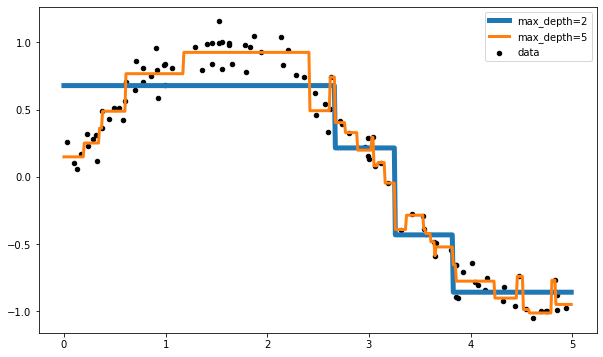

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='k', s=20, label='data')
plt.plot(X_test, y_1, label='max_depth=2', linewidth=5)
plt.plot(X_test, y_2, label='max_depth=5', linewidth=3)
plt.legend()
plt.show()

以上の結果から、深さ5の木の方が、より細かな粒度で正弦波を近似することができているが、グラフ右側に見られるようにノイズの影響を受けやすくなっている様子がうかがえる。